# Downloading, cleaning and exploring COVID19 population data

As a data scientist, you will spend much time dealing with accessing and som basic processing and exploration of datasets. Here we will showcase a typical framework for that, using epidemiology data from the Covid19 pandemic. 

Credit for the dataset: https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30120-1/fulltext

Material borrowed in part from
https://nbviewer.ipython.org/github/BodenmillerGroup/IntroDataAnalysis/blob/master/python/03_pandas_images.ipynb

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

We are provided som links to our datasets. Try to paste one into your browser and see how what it looks like.

In [4]:
# 2019-nCoV Data Repository by Johns Hopkins CSSE
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

## Download the data

Although time often is required to simply access and find the data, we start out here with some URLs provided which link to the datasets. Depending on your data type, data is very often stored in a tabular format in a comma-separated values (CSV) file. Like you know, pandas is the goto library for reading such data, and in fact the `read_csv` function can take URLs as well as file paths.

In [160]:
df = pd.read_csv(confirmed_url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953


In [156]:
# too many columns 
df.columns.shape

(299,)

## Preprocess the data
Currently the data is in a format not too optimal: now each date is a separate column. Secondly we have 3 CSVs, one for cases, one for deaths and one for recovered. We would like to have all in a single dataframe. 

Our desired format should look something like below:
![format](assets/covid_format.png)

in which there is a separate `Date` column, and one column for cases, recoveries and deaths.


#### NaNs

Very often you will have missing data - these missing values are stored as a NaN (Not a Number) values - specifically the numpy object `np.nan`. We want to identify these before we decide what to do with them.

In [93]:
# are there any nans in the columns?
df.isna()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [94]:
# more concise
df.isna().any()

Province/State    False
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
11/7/20           False
11/8/20           False
11/9/20           False
11/10/20          False
11/11/20          False
Length: 299, dtype: bool

In [157]:
# which columns have nans?
for col in df.columns:
    nans=df.loc[:,[col]].isna()
    if nans.any()[0]: print(col, 'has nans')

Province/State has nans


#### Dealing with nans

If the nans were in a numerical column, we would usually have to drop that data point altogether, or fill it in with something else. Usually people use the mean, median or in case of timeseries you could extrapolate beteween the two neighboring points. Now however is a special case, because we want to use `groupby` later, which silently disregards rows with NaN values. Therefore we will simply replace them with an empty string:

In [163]:
df.fillna('', inplace=True)

In [164]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609
1,,Albania,41.15330,20.168300,0,0,0,0,0,0,...,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801
2,,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257
3,,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567
4,,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953


## Reformatting 
We want to perform a computation separately for each country, so we can use the `groupby` method. 

In [99]:
groups = df.groupby(['Country/Region', 'Province/State', 'Lat', 'Long'])

To turn the date columns into a single column called `Date` we use the `melt` method. Furthermore because we want to it seperately for the groups, we use `groups.apply`.
 

melt essentially takes each value in the dataframe and makes a separate row for it, together with the name of the column it appears in. Run the cell below to see the behaviour of the melting operation

In [113]:
df.melt()

,variable,value
0,Province/State,
1,Province/State,
2,Province/State,
3,Province/State,
4,Province/State,
...,...,...
80426,11/11/20,60065
80427,11/11/20,10
80428,11/11/20,2071
80429,11/11/20,17036


But we have to do it groupwise so it doesn't conflate the different countries. To do this we use `groupby`, and the `apply` method. 

In [149]:
groups = df.groupby(['Country/Region', 'Province/State', 'Lat', 'Long'])

And apply the melt operation. 

In [148]:
# make a function of the preprocessing steps
def preprocess(group):
    group = group.melt(var_name='Date')
    return group

In [139]:
groups.apply(preprocess)

Date  \
Country/Region Province/State Lat        Long                            
Afghanistan                    33.939110 67.709953 0    Province/State   
                                                   1    Country/Region   
                                                   2               Lat   
                                                   3              Long   
                                                   4           1/22/20   
...                                                                ...   
Zimbabwe                      -19.015438 29.154857 294         11/7/20   
                                                   295         11/8/20   
                                                   296         11/9/20   
                                                   297        11/10/20   
                                                   298        11/11/20   

                                                              value  
Country/Region Province/State Lat        Long                        
Afghanistan                    33.939110 67.709953 0                 
                                                   1    Afghanistan  
                                                   2        33.9391  
                                                   3          67.71  
                                                   4              0  
...                                                             ...  
Zimbabwe                      -19.015438 29.154857 294         8498  
                                                   295         8531  
                                                   296         8561  
                                                   297         8610  
                                                   298         8667  

[80431 rows x 2 columns]

but as you see, we have a couple of unwanted values in the beginning. Let's drop them first.

In [140]:
def preprocess(group):
    group = group.drop(columns=groups.keys)
    group = group.melt(var_name='Date')
    return group

In [141]:
groups = df.groupby(['Country/Region', 'Province/State', 'Lat', 'Long'])
groups.apply(preprocess)

Date  value
Country/Region Province/State Lat        Long                          
Afghanistan                    33.939110 67.709953 0     1/22/20      0
                                                   1     1/23/20      0
                                                   2     1/24/20      0
                                                   3     1/25/20      0
                                                   4     1/26/20      0
...                                                          ...    ...
Zimbabwe                      -19.015438 29.154857 290   11/7/20   8498
                                                   291   11/8/20   8531
                                                   292   11/9/20   8561
                                                   293  11/10/20   8610
                                                   294  11/11/20   8667

[79355 rows x 2 columns]

Now it looks better. Next, we convert the datetype into datetime (specialized type for dates).
We also pass in an optional parameter to distinguish the cases/recoveries/deaths. Another change is that we set the index to 'Date'. This is important when we later will merge the other dataframes.

In [165]:
def preprocess(group, name):
    group = group.drop(columns=groups.keys)
    group = group.melt(var_name='Date', value_name=name)
    group['Date'] = pd.to_datetime(group['Date'])
    return group.set_index('Date')

In [166]:
groups = df.groupby(['Country/Region', 'Province/State', 'Lat', 'Long'])
cases = groups.apply(preprocess, 'Confirmed')
cases

cases
Country/Region Province/State Lat        Long      Date             
Afghanistan                    33.939110 67.709953 2020-01-22      0
                                                   2020-01-23      0
                                                   2020-01-24      0
                                                   2020-01-25      0
                                                   2020-01-26      0
...                                                              ...
Zimbabwe                      -19.015438 29.154857 2020-11-07   8498
                                                   2020-11-08   8531
                                                   2020-11-09   8561
                                                   2020-11-10   8610
                                                   2020-11-11   8667

[79355 rows x 1 columns]

In [172]:
cases.reset_index() #turn it back into a single-index dataframe format

,Country/Region,Province/State,Lat,Long,Date,cases
0,Afghanistan,,33.939110,67.709953,2020-01-22,0
1,Afghanistan,,33.939110,67.709953,2020-01-23,0
2,Afghanistan,,33.939110,67.709953,2020-01-24,0
3,Afghanistan,,33.939110,67.709953,2020-01-25,0
4,Afghanistan,,33.939110,67.709953,2020-01-26,0
...,...,...,...,...,...,...
79350,Zimbabwe,,-19.015438,29.154857,2020-11-07,8498
79351,Zimbabwe,,-19.015438,29.154857,2020-11-08,8531
79352,Zimbabwe,,-19.015438,29.154857,2020-11-09,8561
79353,Zimbabwe,,-19.015438,29.154857,2020-11-10,8610


#### Exercise 1. Put everything you have learned into a single function "fetch". It should take parameters: URL and name, and return the preprocessed dataframe.
i.e. calling `fetch(cases_url, "Confirmed")` should return the dataframe above this cell.

In [176]:
# %load solutions/ex4_1.py

def fetch(url, name):
    df = pd.read_csv(url).fillna('')
    groups = df.groupby(['Country/Region', 'Province/State', 'Lat', 'Long'])
    def preprocess(group):
        group = group.drop(columns=groups.keys)
        group = group.melt(var_name='Date', value_name=name)
        group['Date'] = pd.to_datetime(group['Date'])
        return group.set_index('Date')
    return groups.apply(preprocess).reset_index()

This next will be slow to run:

In [218]:
#load all
cases = fetch(confirmed_url, 'Confirmed')
recovered = fetch(recovered_url, 'Recovered')
deaths = fetch(deaths_url, 'Deaths')

Finally we merge together the dataframes (here it is important that the rows match.)

In [219]:
df = cases.merge(recovered).merge(deaths)

In [220]:
df

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Recovered,Deaths
0,Afghanistan,,33.939110,67.709953,2020-01-22,0,0,0
1,Afghanistan,,33.939110,67.709953,2020-01-23,0,0,0
2,Afghanistan,,33.939110,67.709953,2020-01-24,0,0,0
3,Afghanistan,,33.939110,67.709953,2020-01-25,0,0,0
4,Afghanistan,,33.939110,67.709953,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
73745,Zimbabwe,,-19.015438,29.154857,2020-11-07,8498,7995,251
73746,Zimbabwe,,-19.015438,29.154857,2020-11-08,8531,8005,253
73747,Zimbabwe,,-19.015438,29.154857,2020-11-09,8561,8023,254
73748,Zimbabwe,,-19.015438,29.154857,2020-11-10,8610,8040,255


In [229]:
#just a routine check
df.isna().any()

Country/Region    False
Province/State    False
Lat               False
Long              False
Date              False
Confirmed         False
Recovered         False
Deaths            False
dtype: bool

In [222]:
# save it so you won't have to reprocess later
df.to_csv('data/covid19.csv', index=False)

In [223]:
df.shape

(73750, 8)

## Resume here 

In [224]:
df = pd.read_csv('data/covid19.csv').fillna('')

In [225]:
df.dtypes

Country/Region     object
Province/State     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Recovered           int64
Deaths              int64
dtype: object

In [226]:
df['Date'] = pd.to_datetime(df['Date'])

In [228]:
df.isna().any()

Country/Region    False
Province/State    False
Lat               False
Long              False
Date              False
Confirmed         False
Recovered         False
Deaths            False
dtype: bool

In [230]:
# sort first by country, then province, and finally date
df.sort_values( 
    ['Country/Region', 'Province/State', 'Date'],
    ascending=[True, True, False]
)

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Recovered,Deaths
294,Afghanistan,,33.939110,67.709953,2020-11-11,42609,34967,1581
293,Afghanistan,,33.939110,67.709953,2020-11-10,42463,34954,1577
292,Afghanistan,,33.939110,67.709953,2020-11-09,42297,34721,1574
291,Afghanistan,,33.939110,67.709953,2020-11-08,42092,34458,1558
290,Afghanistan,,33.939110,67.709953,2020-11-07,42033,34446,1556
...,...,...,...,...,...,...,...,...
73459,Zimbabwe,,-19.015438,29.154857,2020-01-26,0,0,0
73458,Zimbabwe,,-19.015438,29.154857,2020-01-25,0,0,0
73457,Zimbabwe,,-19.015438,29.154857,2020-01-24,0,0,0
73456,Zimbabwe,,-19.015438,29.154857,2020-01-23,0,0,0


Next we want to plot the number of cases on a world map. This requires a little bit more processing. We are only interested in the total number of cases. Because the table is cumulative, we can use `df['Date'].max()` - identifying the latest date recorded and the associated value. But first we group by country. We do this for cases, recoveries and deaths

In [232]:
for country_region, g in df.groupby('Country/Region'): #g for group
    max_date = g['Date'].max()
    confirmed = g.loc[g['Date'] == max_date, 'Confirmed'].sum()
    recovered = g.loc[g['Date'] == max_date, 'Recovered'].sum()
    deaths = g.loc[g['Date'] == max_date, 'Deaths'].sum()
    print(confirmed, recovered, deaths, country_region, sep='\t')

42609	34967	1581	Afghanistan
25801	12493	590	Albania
64257	42980	2093	Algeria
5567	4488	75	Andorra
12953	6125	312	Angola
131	124	3	Antigua and Barbuda
1273356	1081897	34531	Argentina
110548	68336	1636	Armenia
27675	25455	907	Australia
172380	103759	1564	Austria
68594	51007	885	Azerbaijan
7060	5099	154	Bahamas
84042	81658	332	Bahrain
425353	343131	6127	Bangladesh
249	233	7	Barbados
109357	92266	1022	Belarus
515391	31130	13758	Belgium
4520	2485	75	Belize
2844	2515	43	Benin
364	345	0	Bhutan
142776	115718	8818	Bolivia
66565	32769	1701	Bosnia and Herzegovina
7835	5534	27	Botswana
5747660	5222937	163368	Brazil
148	145	3	Brunei
87311	26714	1898	Bulgaria
2586	2411	67	Burkina Faso
64453	48532	1480	Burma
620	549	1	Burundi
9560	8829	102	Cabo Verde
301	288	0	Cambodia
22490	21510	433	Cameroon
4884	1924	62	Central African Republic
1565	1420	99	Chad
524804	501426	14633	Chile
90093	84831	4714	China
1165326	1070423	33312	Colombia
569	541	7	Comoros
5379	3887	92	Congo (Brazzaville)
11656	10963	316	Congo 

 Now we will only look at new cases:

In [27]:
confirmed = df.drop(columns=['Recovered', 'Deaths'])

In [28]:
confirmed.dtypes

Country/Region            object
Province/State            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                float64
dtype: object

In [29]:
confirmed

,Country/Region,Province/State,Lat,Long,Date,Confirmed
287,Afghanistan,NaN,33.939110,67.709953,2020-01-22,0.0
288,Afghanistan,NaN,33.939110,67.709953,2020-01-23,0.0
289,Afghanistan,NaN,33.939110,67.709953,2020-01-24,0.0
290,Afghanistan,NaN,33.939110,67.709953,2020-01-25,0.0
291,Afghanistan,NaN,33.939110,67.709953,2020-01-26,0.0
...,...,...,...,...,...,...
63135,Zimbabwe,NaN,-19.015438,29.154857,2020-10-30,8362.0
63136,Zimbabwe,NaN,-19.015438,29.154857,2020-10-31,8367.0
63137,Zimbabwe,NaN,-19.015438,29.154857,2020-11-01,8374.0
63138,Zimbabwe,NaN,-19.015438,29.154857,2020-11-02,8389.0


In [30]:
grouped = confirmed.groupby('Country/Region')

## Visualize the data 

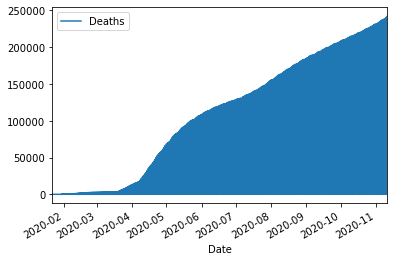

In [242]:
df.plot(x='Date',y='Deaths')

In [265]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guin

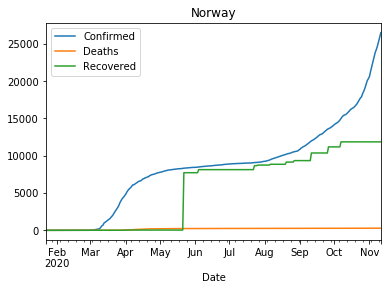

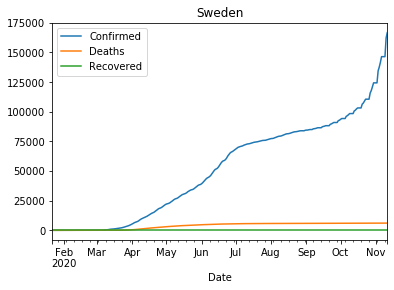

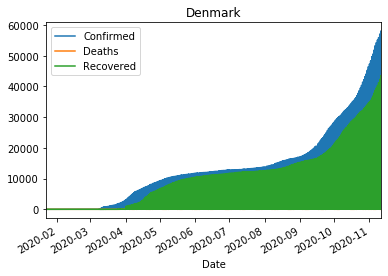

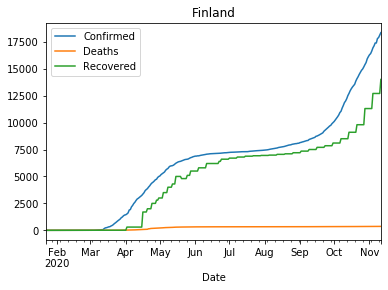

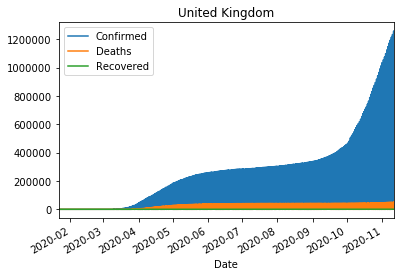

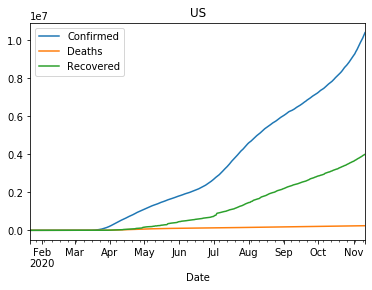

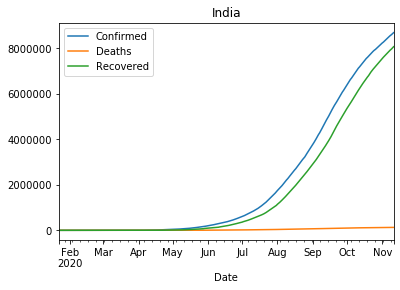

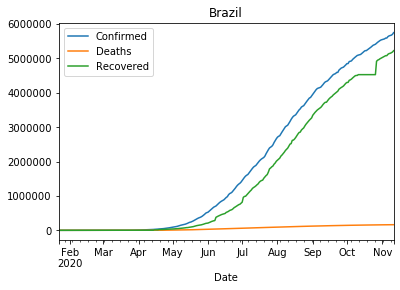

In [281]:
groups = df.groupby('Country/Region')
country_list=['Norway', 'Sweden', 'Denmark', 'Finland','United Kingdom', 'US', 'India', 'Brazil', ]

for cty in country_list:
    idx = groups.groups[cty]
    df.iloc[idx].plot(x='Date',y=['Confirmed','Deaths','Recovered'], kind='line')
    plt.title(cty)

In [282]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [287]:
df

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Recovered,Deaths
0,Afghanistan,,33.939110,67.709953,2020-01-22,0,0,0
1,Afghanistan,,33.939110,67.709953,2020-01-23,0,0,0
2,Afghanistan,,33.939110,67.709953,2020-01-24,0,0,0
3,Afghanistan,,33.939110,67.709953,2020-01-25,0,0,0
4,Afghanistan,,33.939110,67.709953,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
73745,Zimbabwe,,-19.015438,29.154857,2020-11-07,8498,7995,251
73746,Zimbabwe,,-19.015438,29.154857,2020-11-08,8531,8005,253
73747,Zimbabwe,,-19.015438,29.154857,2020-11-09,8561,8023,254
73748,Zimbabwe,,-19.015438,29.154857,2020-11-10,8610,8040,255


In [290]:
df.groupby('Country/Region')

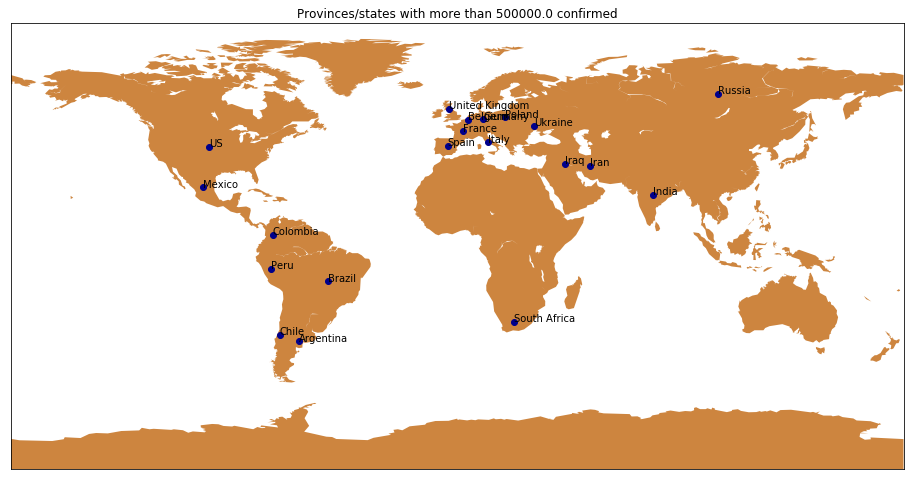

In [305]:
case_thres = 5e5
case_type = 'Confirmed'

def plot_covid_map(df, case_type, case_thres=10000):
    m = Basemap(projection='cyl')
    m.fillcontinents(color='peru')
    groupby_columns = ['Country/Region', 'Province/State', 'Lat', 'Long']
    
    for k, g in df.groupby(groupby_columns):
        country_region, province_state, lat, long = k
        num_cases = g.loc[g['Date'] == g['Date'].max(), case_type].sum()
        if num_cases > case_thres:
            x, y = m(long, lat)
            p = m.plot(x, y, 'o', color='darkblue')
            plt.text(x, y, province_state or country_region)
        

plt.figure(figsize=(16, 12))
plot_covid_map(df, case_type, case_thres)
plt.title(f'Provinces/states with more than {case_thres} {case_type.lower()}')
plt.show()



#### Exercise 2. Copy and modify the above piece of code such that the size of the dot is proportional to the total number of cases in that country/region.

In [306]:
# %load solutions/ex4_2.py

def my_plot(df, case_type, case_thres=50000):
    m = Basemap(projection='cyl')
    m.fillcontinents(color='peru', alpha=0.3)
    groupby_columns = ['Country/Region', 'Province/State', 'Lat', 'Long']
    max_num_cases = df[case_type].max()
    
    for k, g in df.groupby(groupby_columns):
        country_region, province_state, lat, long = k
        num_cases = g.loc[g['Date'] == g['Date'].max(), case_type].sum()
        if num_cases > case_thres:
            x, y = m(long, lat)
            
            opacity = np.log(num_cases) / np.log(max_num_cases)
            size = num_cases / max_num_cases
                        
            #print(country_region, opacity)
            
            #p = m.plot(x, y, marker='o',color='darkblue', alpha=opacity*4)
            
            p = m.scatter(long, lat, marker='o',color='darkblue', s=size*500, alpha=opacity)
            
            if num_cases > 1000000:
                plt.text(x, y, province_state or country_region)



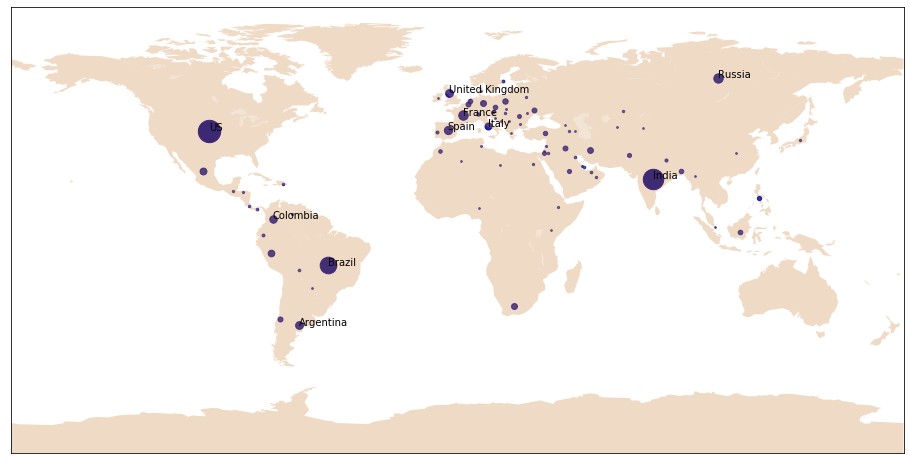

In [307]:
plt.figure(figsize=(16, 12))
my_plot(df, 'Confirmed')

#### Extra: How about plotting the deaths/confirmed ratio?

In [ ]:
### your code here

In [1]:


# Set the dimension of the figure
#my_dpi=96
#plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
# 
## read the data (on the web)
#data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
# 
## Make the background map
#m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
#m.fillcontinents(color='grey', alpha=0.3)
#m.drawcoastlines(linewidth=0.1, color="white")
# 
## prepare a color for each point depending on the continent.
#data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
# 
## Add a point per position
#m.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")
# 
## copyright and source data info
#plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
# 
## Save as png
#plt.savefig('#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')